# Spliting Data, EDA, Feature Engineering and Selection

In [1]:
import feature_eng_utils as feu
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

In [2]:
df_mf = pd.read_csv('../Data/US_mutual_fund_data_cleaned')

### Remove features that are directly derived from or indicative of past performance (target) - if you have a brand new mutual fund, will this feature still be available? 

In [3]:
df_mf.drop(['Morningstar Risk','Dividend Yield (%)','% of Holdings in Cash','Price/Earnings','Price/Cash Flow','Average Market Cap ($ mil)'], axis=1, inplace=True)

### Train Test split - hold out 20% of data for final testing

In [4]:
X = df_mf.drop('Outperform / Underperform', axis=1)
y = df_mf['Outperform / Underperform']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=10)
df_mf_train = pd.concat([X_train, y_train], axis=1).reset_index(drop=True)
df_mf_test = pd.concat([X_test, y_test], axis=1).reset_index(drop=True)

In [5]:
df_mf_train.head()

,Ticker,Morningstar Sustainability Rating,ROE Last Year (%),Debt/Capital Last Year (%),No. of Holdings in Portfolio,% Assets in Top 10 Holdings,Turnover Ratio (%),Average Manager Tenure (years),Expense Ratio (%),No-load Funds,Minimum Initial Purchase ($),Total Assets ($ mil),Closed to New Investors,3-year Annualized Return vs. S&P500,Outperform / Underperform
0,VFTNX,4,28.22,45.19,470,30.13,18,5,0.12,Yes,5000000,10798,No,4.48,1
1,FTRIX,2,21.38,46.48,81,38.76,49,8,0.65,Yes,0,1292,No,-1.32,0
2,PSIAX,3,27.38,45.62,511,26.50,2,12,0.53,No,1000,818,No,1.04,1
3,NSIDX,2,-1.30,37.91,2044,4.06,18,8,0.15,Yes,2500,1561,No,0.97,1
4,TIGRX,2,23.15,44.32,182,28.55,64,16,0.40,Yes,2000000,5988,No,0.88,1


In [6]:
df_mf_test.head()

,Ticker,Morningstar Sustainability Rating,ROE Last Year (%),Debt/Capital Last Year (%),No. of Holdings in Portfolio,% Assets in Top 10 Holdings,Turnover Ratio (%),Average Manager Tenure (years),Expense Ratio (%),No-load Funds,Minimum Initial Purchase ($),Total Assets ($ mil),Closed to New Investors,3-year Annualized Return vs. S&P500,Outperform / Underperform
0,FGRTX,2,21.38,46.48,81,38.76,49,8,0.64,Yes,0,1292,No,-1.30,0
1,VYMVX,3,12.10,39.72,369,8.59,51,4,1.21,No,0,130,No,-6.44,0
2,ACAAX,3,26.68,39.22,80,51.87,90,11,1.17,No,1000,3100,No,8.98,1
3,FWWMX,2,20.76,46.39,182,30.64,30,9,0.33,Yes,250,138572,No,-2.72,0
4,LAVRX,2,22.20,47.85,75,22.34,59,2,1.19,No,0,1832,No,-8.19,0


### Remove mutual funds with similar performance as S&P500 to give better separation (Outperform/Underperform by +/- 2%)

In [7]:
df_mf_train = feu.performance_threshold(df_mf_train, 2)

In [8]:
df_mf_train

,Ticker,Morningstar Sustainability Rating,ROE Last Year (%),Debt/Capital Last Year (%),No. of Holdings in Portfolio,% Assets in Top 10 Holdings,Turnover Ratio (%),Average Manager Tenure (years),Expense Ratio (%),No-load Funds,Minimum Initial Purchase ($),Total Assets ($ mil),Closed to New Investors,3-year Annualized Return vs. S&P500,Outperform / Underperform
0,VFTNX,4,28.22,45.19,470,30.13,18,5,0.12,Yes,5000000,10798,No,4.48,1
1,JCNNX,1,10.25,48.60,45,44.05,68,4,0.58,Yes,1000000,3785,No,7.61,1
2,PMJPX,4,0.62,46.75,782,12.57,202,6,0.63,Yes,1000000,552,No,-4.02,0
3,WMICX,2,-6.53,30.18,75,25.07,75,10,1.66,Yes,2000,1410,No,23.85,1
4,STAEX,3,24.25,45.50,39,47.94,16,8,1.02,No,1000,287,No,9.69,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3952,SASCX,2,2.15,36.92,2027,9.58,68,0,1.90,No,500,43,No,-5.90,0
3953,GPSCX,1,-8.33,43.24,41,38.97,89,9,1.26,No,2500,89,Yes,8.04,1
3954,MFVAX,3,24.13,51.41,71,37.72,41,4,1.29,No,0,762,No,-3.24,0
3955,RFNCX,2,18.85,43.92,327,23.69,40,9,0.94,No,250,117632,No,-2.51,0


## EDA - create plots to analyze relationships between features and target

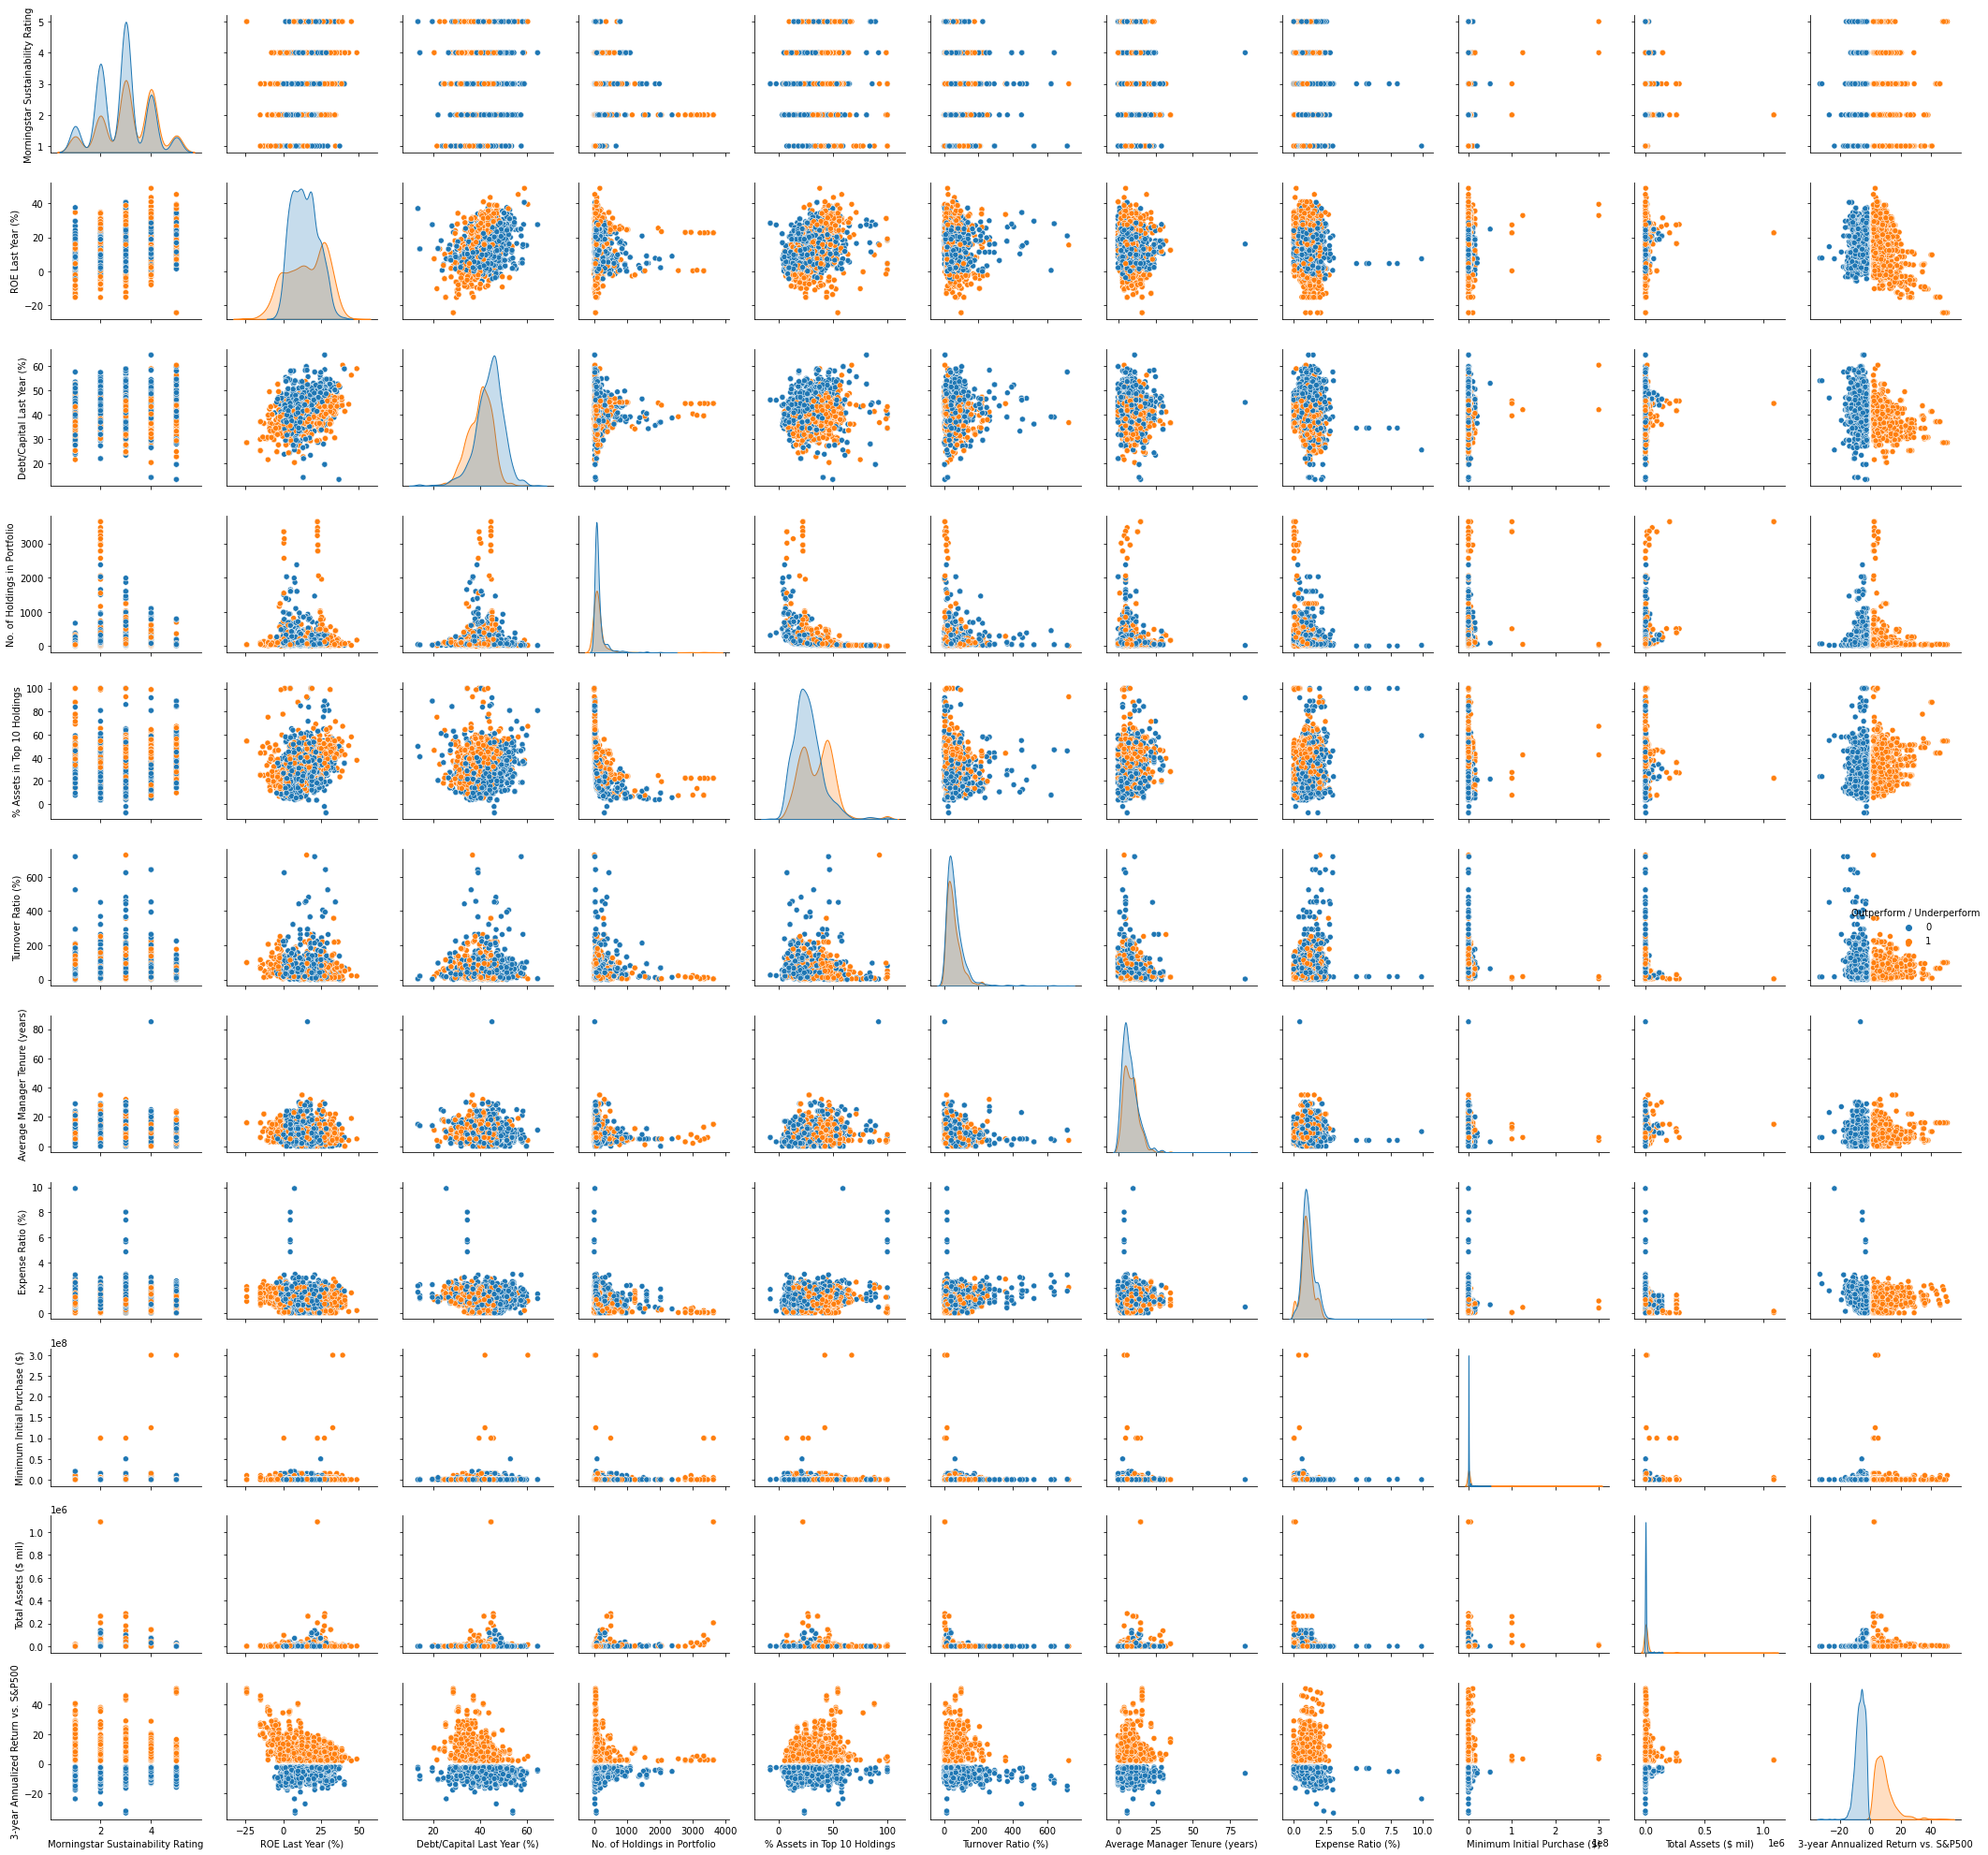

In [9]:
sns.pairplot(df_mf_train, hue='Outperform / Underperform')
plt.tight_layout()
plt.savefig('../Charts/pairplot.png')

### Distribution plots for each numerical feature, separated by target labels

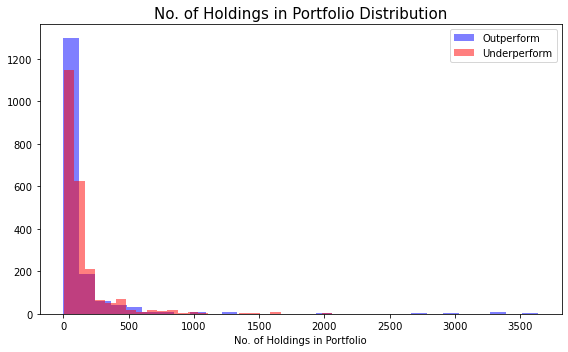

In [10]:
feu.distribution_plot(df_mf_train, 'No. of Holdings in Portfolio')
plt.tight_layout()
plt.savefig('../Charts/dist_holdings_cap.png')

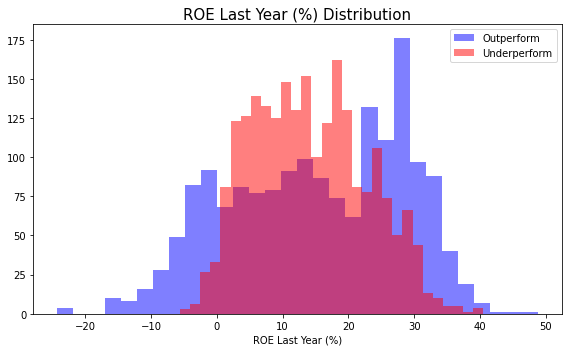

In [11]:
feu.distribution_plot(df_mf_train, 'ROE Last Year (%)')
plt.tight_layout()
plt.savefig('../Charts/dist_ROE.png')

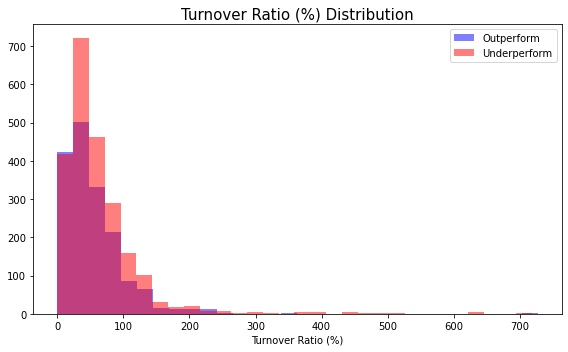

In [12]:
feu.distribution_plot(df_mf_train, 'Turnover Ratio (%)')
plt.tight_layout()
plt.savefig('../Charts/dist_turnover.png')

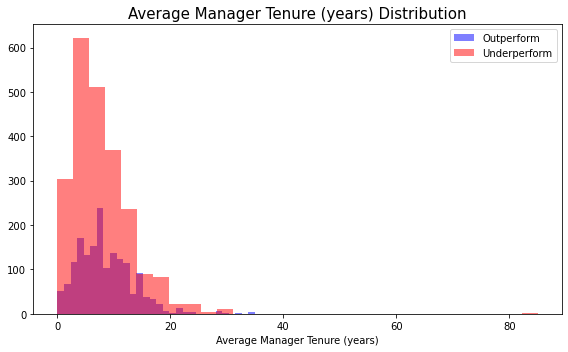

In [13]:
feu.distribution_plot(df_mf_train, 'Average Manager Tenure (years)')
plt.tight_layout()
plt.savefig('../Charts/dist_manager_tenure.png')

### Count plots for each categorical feature, separated by target labels

/Users/mike/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


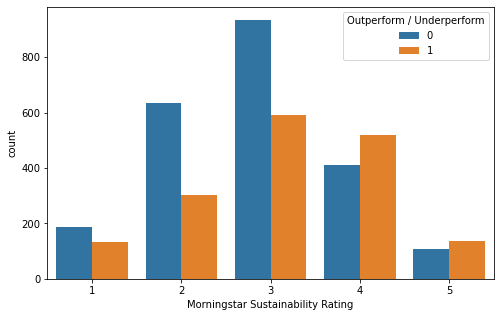

In [14]:
feu.count_plot(df_mf_train, 'Morningstar Sustainability Rating')

/Users/mike/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


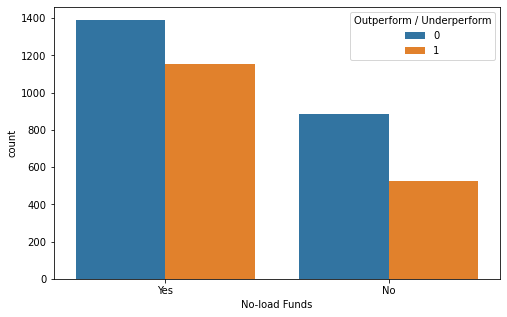

In [15]:
feu.count_plot(df_mf_train, 'No-load Funds')

/Users/mike/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


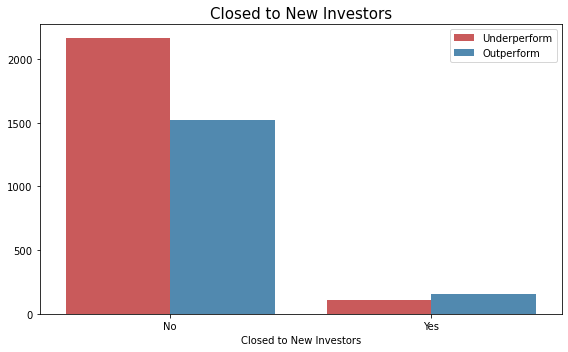

In [16]:
feu.count_plot2(df_mf_train, 'Closed to New Investors')
plt.tight_layout()
plt.savefig('../Charts/count_closed_to_new.png')

In [17]:
df_mf_train[df_mf_train['Closed to New Investors'] == 'Yes']['Outperform / Underperform'].value_counts()

1    154
0    112
Name: Outperform / Underperform, dtype: int64

## Feature Engineering

### Convert categorical features to dummy variables

In [18]:
df_mf_train = feu.convert_cat_to_dummy(df_mf_train, 'No-load Funds')
df_mf_train = feu.convert_cat_to_dummy(df_mf_train, 'Closed to New Investors')

In [19]:
df_mf_test = feu.convert_cat_to_dummy(df_mf_test, 'No-load Funds')
df_mf_test = feu.convert_cat_to_dummy(df_mf_test, 'Closed to New Investors')

In [20]:
df_mf_train.columns = ['Ticker','Morningstar Sustainability Rating','ROE Last Year (%)',
                       'Debt/Capital Last Year (%)','No. of Holdings in Portfolio','% Assets in Top 10 Holdings',
                       'Turnover Ratio (%)','Average Manager Tenure (years)','Expense Ratio (%)',
                       'Minimum Initial Purchase ($)','Total Assets ($ mil)','3-year Annualized Return vs. S&P500',
                       'Outperform / Underperform','No-load Funds (Yes=1, No=0)','Closed to New Investors (Yes=1, No=0)']

df_mf_test.columns = ['Ticker','Morningstar Sustainability Rating','ROE Last Year (%)',
                       'Debt/Capital Last Year (%)','No. of Holdings in Portfolio','% Assets in Top 10 Holdings',
                       'Turnover Ratio (%)','Average Manager Tenure (years)','Expense Ratio (%)',
                       'Minimum Initial Purchase ($)','Total Assets ($ mil)','3-year Annualized Return vs. S&P500',
                       'Outperform / Underperform','No-load Funds (Yes=1, No=0)','Closed to New Investors (Yes=1, No=0)']

In [21]:
df_mf_train

,Ticker,Morningstar Sustainability Rating,ROE Last Year (%),Debt/Capital Last Year (%),No. of Holdings in Portfolio,% Assets in Top 10 Holdings,Turnover Ratio (%),Average Manager Tenure (years),Expense Ratio (%),Minimum Initial Purchase ($),Total Assets ($ mil),3-year Annualized Return vs. S&P500,Outperform / Underperform,"No-load Funds (Yes=1, No=0)","Closed to New Investors (Yes=1, No=0)"
0,VFTNX,4,28.22,45.19,470,30.13,18,5,0.12,5000000,10798,4.48,1,1,0
1,JCNNX,1,10.25,48.60,45,44.05,68,4,0.58,1000000,3785,7.61,1,1,0
2,PMJPX,4,0.62,46.75,782,12.57,202,6,0.63,1000000,552,-4.02,0,1,0
3,WMICX,2,-6.53,30.18,75,25.07,75,10,1.66,2000,1410,23.85,1,1,0
4,STAEX,3,24.25,45.50,39,47.94,16,8,1.02,1000,287,9.69,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3952,SASCX,2,2.15,36.92,2027,9.58,68,0,1.90,500,43,-5.90,0,0,0
3953,GPSCX,1,-8.33,43.24,41,38.97,89,9,1.26,2500,89,8.04,1,0,1
3954,MFVAX,3,24.13,51.41,71,37.72,41,4,1.29,0,762,-3.24,0,0,0
3955,RFNCX,2,18.85,43.92,327,23.69,40,9,0.94,250,117632,-2.51,0,0,0


In [22]:
df_mf_test

,Ticker,Morningstar Sustainability Rating,ROE Last Year (%),Debt/Capital Last Year (%),No. of Holdings in Portfolio,% Assets in Top 10 Holdings,Turnover Ratio (%),Average Manager Tenure (years),Expense Ratio (%),Minimum Initial Purchase ($),Total Assets ($ mil),3-year Annualized Return vs. S&P500,Outperform / Underperform,"No-load Funds (Yes=1, No=0)","Closed to New Investors (Yes=1, No=0)"
0,FGRTX,2,21.38,46.48,81,38.76,49,8,0.64,0,1292,-1.30,0,1,0
1,VYMVX,3,12.10,39.72,369,8.59,51,4,1.21,0,130,-6.44,0,0,0
2,ACAAX,3,26.68,39.22,80,51.87,90,11,1.17,1000,3100,8.98,1,0,0
3,FWWMX,2,20.76,46.39,182,30.64,30,9,0.33,250,138572,-2.72,0,1,0
4,LAVRX,2,22.20,47.85,75,22.34,59,2,1.19,0,1832,-8.19,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199,MDSKX,2,-1.30,37.93,2045,4.04,20,4,0.37,1000,3027,0.73,1,1,0
1200,NEEIX,4,5.24,29.33,77,51.38,13,12,1.43,100000,156,12.14,1,1,0
1201,MXVJX,3,27.32,45.82,505,27.98,4,5,0.79,0,2887,0.36,1,1,1
1202,DLMIX,3,11.97,45.50,97,18.57,43,8,0.89,0,76,-8.93,0,1,0


## Feature selection

In [23]:
X_train_base = df_mf_train.drop(['Ticker','3-year Annualized Return vs. S&P500','Outperform / Underperform'], axis=1)
y_train_base = df_mf_train['Outperform / Underperform']

X_test_base = df_mf_test.drop(['Ticker','3-year Annualized Return vs. S&P500','Outperform / Underperform'], axis=1)
y_test_base = df_mf_test['Outperform / Underperform']

### Univariate feature selection

#### (1) Chi-square test

In [24]:
df_chi2 = feu.univ_feature_selection(X_train_base, y_train_base, chi2, 5)
df_chi2

,Feature Selection (True/False)
Morningstar Sustainability Rating,True
ROE Last Year (%),False
Debt/Capital Last Year (%),True
No. of Holdings in Portfolio,False
% Assets in Top 10 Holdings,True
Turnover Ratio (%),False
Average Manager Tenure (years),False
Expense Ratio (%),False
Minimum Initial Purchase ($),False
Total Assets ($ mil),False


#### (2) f test

In [25]:
df_f = feu.univ_feature_selection(X_train_base, y_train_base, f_classif, 5)
df_f

,Feature Selection (True/False)
Morningstar Sustainability Rating,True
ROE Last Year (%),False
Debt/Capital Last Year (%),True
No. of Holdings in Portfolio,False
% Assets in Top 10 Holdings,True
Turnover Ratio (%),False
Average Manager Tenure (years),False
Expense Ratio (%),True
Minimum Initial Purchase ($),False
Total Assets ($ mil),True


#### (3) mutual_info_classif test

In [26]:
df_mutual = feu.univ_feature_selection(X_train_base, y_train_base, mutual_info_classif, 5)
df_mutual

,Feature Selection (True/False)
Morningstar Sustainability Rating,False
ROE Last Year (%),True
Debt/Capital Last Year (%),True
No. of Holdings in Portfolio,True
% Assets in Top 10 Holdings,True
Turnover Ratio (%),False
Average Manager Tenure (years),False
Expense Ratio (%),False
Minimum Initial Purchase ($),False
Total Assets ($ mil),True


### Wrapper methods

#### Recursive feature selection - random forest

In [27]:
df_rfe_tree = feu.rec_feature_selection(X_train_base, y_train_base, RandomForestClassifier, 5)
df_rfe_tree

,Feature Selection (True/False)
Morningstar Sustainability Rating,False
ROE Last Year (%),True
Debt/Capital Last Year (%),True
No. of Holdings in Portfolio,True
% Assets in Top 10 Holdings,True
Turnover Ratio (%),False
Average Manager Tenure (years),False
Expense Ratio (%),False
Minimum Initial Purchase ($),False
Total Assets ($ mil),True


#### Exhaustive feature selection

In [29]:
# efs = ExhaustiveFeatureSelector(RandomForestClassifier(), min_features = 5, max_features = 5, scoring='accuracy', cv=5)

In [30]:
# efs = efs.fit(X_train_base, y_train_base)

In [31]:
# selected_features = efs.best_feature_names_

In [32]:
# print(selected_features)
# print(efs.best_score_)

### Feature selection using SelectFromModel

#### Tree-based feature selection

In [33]:
df_sfm_tree = feu.sfm_feature_selection(X_train_base, y_train_base, RandomForestClassifier)
df_sfm_tree

,Feature Selection (True/False)
Morningstar Sustainability Rating,False
ROE Last Year (%),True
Debt/Capital Last Year (%),True
No. of Holdings in Portfolio,False
% Assets in Top 10 Holdings,True
Turnover Ratio (%),False
Average Manager Tenure (years),False
Expense Ratio (%),False
Minimum Initial Purchase ($),False
Total Assets ($ mil),True


## Create and save different feature-target combinations

### Baseline model - all initial features

In [34]:
df_mf_train.to_csv('../Data/df_mf_train.csv', index=False)
df_mf_test.to_csv('../Data/df_mf_test.csv', index=False)

### Model set 2 - select the top three overlapping features from the feature selection methods

In [35]:
df2_mf_train = df_mf_train[['Ticker', 'Debt/Capital Last Year (%)',
                            '% Assets in Top 10 Holdings','3-year Annualized Return vs. S&P500',
                            'Outperform / Underperform']]

df2_mf_test = df_mf_test[['Ticker', 'Debt/Capital Last Year (%)',
                            '% Assets in Top 10 Holdings','3-year Annualized Return vs. S&P500',
                            'Outperform / Underperform']]

In [36]:
df2_mf_train.to_csv('../Data/df2_mf_train.csv', index=False)
df2_mf_test.to_csv('../Data/df2_mf_test.csv', index=False)

### Model set 3 - add two more features

In [37]:
df3_mf_train = df_mf_train[['Ticker', 'ROE Last Year (%)', 'Debt/Capital Last Year (%)', 'No. of Holdings in Portfolio',
                            '% Assets in Top 10 Holdings','Closed to New Investors (Yes=1, No=0)',
                            '3-year Annualized Return vs. S&P500','Outperform / Underperform']]

df3_mf_test = df_mf_test[['Ticker', 'ROE Last Year (%)', 'Debt/Capital Last Year (%)', 'No. of Holdings in Portfolio',
                            '% Assets in Top 10 Holdings','Closed to New Investors (Yes=1, No=0)',
                            '3-year Annualized Return vs. S&P500','Outperform / Underperform']]

In [38]:
df3_mf_train.to_csv('../Data/df3_mf_train.csv', index=False)
df3_mf_test.to_csv('../Data/df3_mf_test.csv', index=False)